In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')
df.shape

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['Outcome'],axis = 1),
    df['Outcome'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==9
]
len(constant_features)

###  **Constant Features**

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with 100 rows and 5 random features
data = {
    'feature_1': np.random.normal(0, 1, 100),
    'feature_2': np.random.normal(5, 2, 100),
    'feature_3': np.random.randint(0, 10, 100),
    
    # Constant features
    'feature_4': 0,             # All zeros
    'feature_5': 3.1415         # All the same value
}

df = pd.DataFrame(data)

# Add a target column (for ML use)
df['target'] = np.random.choice([0, 1], size=100)

# Save to CSV (optional)
# df.to_csv("raw_dataset_with_constant_features.csv", index=False)

print(df.head())


In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

### **Quasi Constant Features**

In [ ]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)


# **Raw Data**

## Dataset 1

In [ ]:
import pandas as pd

# Load SECOM data and labels
data = pd.read_csv('/kaggle/input/secom-data/secom_data.csv', sep='\s+', header=None)
labels = pd.read_csv('/kaggle/input/secom-data/secom_labels.csv', sep='\s+', header=None)

# Keep only the label column (ignore timestamp)
labels = labels[[0]]
labels.columns = ['target']

# Combine features and target
df = pd.concat([data, labels], axis=1)

# Optional: Save combined dataset
df.to_csv('/content/secom_combined.csv', index=False)

# Preview
print(df.shape)
df.head()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

### **Duplicate Features**

In [ ]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))
x_train.drop(labels = duplicate_features,axis = 1,inplace=True)
x_test.drop(labels = duplicate_features,axis = 1,inplace=True)



In [ ]:
duplicate_feats = []

for i in range(len(x_train.columns)):
    col_1 = x_train.columns[i]
    for j in range(i + 1, len(x_train.columns)):
        col_2 = x_train.columns[j]
        if x_train[col_1].equals(x_train[col_2]):
            duplicate_feats.append(col_2)

print("Duplicate features:", duplicate_feats)
duplicate_features = set(duplicate_feats)
print(len(duplicate_features))

### Quasi Constant

In [ ]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
print(len(quasi_constant_features))
x_train.drop(labels = quasi_constant_features,axis = 1,inplace=True)
x_test.drop(labels = quasi_constant_features,axis = 1,inplace=True)


In [ ]:
quasi_constant_features = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts()/np.float64(len(x_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        quasi_constant_features.append(feature)
len(quasi_constant_features)

### Constant Features

In [ ]:
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

In [ ]:
x_train.drop(labels = constant_features,axis = 1,inplace=True)
x_test.drop(labels = constant_features,axis = 1,inplace=True)
constant_features = [
    features for features in x_train.columns if x_train[features].std()==0
]
len(constant_features)

NaN values

In [ ]:
print(df.isna().sum().sort_values(ascending=False).head())


Removing NaN with threshold 90%

In [ ]:
threshold = 0.9
df = df.loc[:, df.isna().mean() < threshold]
print(f"Remaining columns: {df.shape[1]}")

Filling rest of NaN values

In [ ]:
# Fill remaining NaNs with column median
df = df.fillna(df.median(numeric_only=True))


In [ ]:
print(df.isna().sum().sort_values(ascending=False).head())


### **Correlation**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['target'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0
)

In [ ]:
corr_mat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [ ]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


In [ ]:
x_train.drop(labels=correlated_features,axis = 1,inplace = True)
x_test.drop(labels=correlated_features,axis = 1,inplace = True)

In [ ]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(x_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated features


### **Mutual Information**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# fill missing values before MI computation
mi = mutual_info_classif(x_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=x_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(x_train.fillna(0), y_train)

# Get the names of selected features
selected_features = x_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)


In [ ]:
# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(x_train.fillna(0))
X_test_selected = sel_.transform(x_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = x_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=x_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=x_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


## Madelon

In [ ]:
import pandas as pd
import numpy as np

# Load training features
X_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.data', sep='\s+', header=None)

# Load training labels
y_train = pd.read_csv('/kaggle/input/madelon-direct/madelon_train.labels', sep='\s+', header=None)
y_train = y_train[0]  # convert to Series

# Optionally: load validation and test data
X_valid = pd.read_csv('/kaggle/input/madelon-direct/madelon_valid.data', sep='\s+', header=None)
X_test = pd.read_csv('/kaggle/input/madelon-direct/madelon_test.data', sep='\s+', header=None)

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)


# **WEEK - 3**

In [ ]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_test.csv')

# Print basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Separate features and target from train data
X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

# Drop 'ID' from both datasets before model training
X_train = X_train.drop(columns=['ID'])
X_test = test_df.drop(columns=['ID'])

# Combine X and y into a single DataFrame for feature selection
df = pd.concat([X_train, y_train], axis=1)

# Verify shape and structure
print("Combined dataframe shape:", df.shape)
print("Columns:", df.columns[-5:])  # Show last few columns (should include 'TARGET')

# Rename TARGET column if needed
df.rename(columns={'TARGET': 'target'}, inplace=True)

# Preview
print("\n✅ Cleaned datasets ready:")
print(f"Features (X_train): {X_train.shape}")
print(f"Target (y_train): {y_train.shape}")
print(f"Test features (X_test): {X_test.shape}")

# Sample preview
print("\nX_train sample:")
print(X_train.head())
print("\nTarget distribution:")
print(y_train.value_counts())


In [ ]:
#Constant 
constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
print(len(constantFeatures))
X_train.drop(labels = constantFeatures, axis  = 1, inplace = True)
X_test.drop(labels = constantFeatures, axis  = 1, inplace = True)

In [ ]:
constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
print(len(constantFeatures))

In [ ]:
#Quasi Constant
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

In [ ]:
X_train.drop(labels = qConsFeats, axis  = 1, inplace = True)
X_test.drop(labels = qConsFeats, axis  = 1, inplace = True)

In [ ]:
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

In [ ]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

In [ ]:
X_train.drop(labels = dFeats, axis  = 1, inplace = True)
X_test.drop(labels = dFeats, axis  = 1, inplace = True)

In [ ]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

In [ ]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [ ]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

In [ ]:
X_train.drop(labels = correlated_features, axis  = 1, inplace = True)
X_test.drop(labels = correlated_features, axis  = 1, inplace = True)

In [ ]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

In [ ]:
#Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# fill missing values before MI computation
mi = mutual_info_classif(X_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=X_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()

In [ ]:
# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=10)
sel_.fit(X_train.fillna(0), y_train)

# Get the names of selected features
selected_features = X_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)

In [ ]:


# transform X_train and X_test to keep only selected features
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

# if you want a DataFrame with the feature names preserved:
selected_feature_names = X_train.columns[sel_.get_support()]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test.index)

print("Transformed X_train shape:", X_train_selected_df.shape)
print("Transformed X_test shape:", X_test_selected_df.shape)


In [ ]:
#Chi-Square
from sklearn.feature_selection import chi2

In [ ]:
#Replace negative values with 0
X_train[X_train < 0] = 0
X_test[X_test < 0] = 0

In [ ]:
f_score = chi2(X_train.fillna(0),y_train)
print(f"f-score {f_score}")

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)


In [ ]:
significant_features = pvalues[pvalues < 0.05].index.tolist()

X_train_selected_df = X_train[significant_features]
X_test_selected_df = X_test[significant_features]

print(f"Selected {len(significant_features)} features with p < 0.05")


In [ ]:
#Annova
from sklearn.feature_selection import f_classif

In [ ]:
f_score, p_value = f_classif(X_train, y_train)
print("F-scores:", f_score)
print("p-values:", p_value)

In [ ]:
import pandas as pd

p_values_series = pd.Series(p_value, index=X_train.columns)
f_scores_series = pd.Series(f_score, index=X_train.columns)

# Sort by p-value (ascending = more significant)
sorted_p = p_values_series.sort_values()
print(sorted_p)

In [ ]:
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
print(f"Number of selected features: {len(selected_features)}")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['target'],axis = 1),
    df['target'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

roc_values = []

for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    
    # Reshape the feature into 2D with .to_frame()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # Predict probabilities
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    
    # Compute ROC AUC for the positive class
    auc = roc_auc_score(y_test, y_scored[:, 1])
    roc_values.append(auc)

# Convert to Series with feature names as index
roc_values = pd.Series(roc_values, index=X_train.columns)

# Sort by AUC value
roc_values_sorted = roc_values.sort_values(ascending=False)

# Print number of features better than random
print(f"Number of features with ROC AUC > 0.6: {len(roc_values[roc_values > 0.6])}")


In [ ]:
top_features = roc_values.sort_values(ascending=False)
print(top_features.head(10))  # top 10 features

In [ ]:
selected_features = roc_values[roc_values > 0.6].index.tolist()
selected_features

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### Wrapper

In [ ]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_train.csv')
test_df = pd.read_csv('/kaggle/input/customer-satisfaction/Santander Customer Satisfaction_test.csv')

# Print basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Separate features and target from train data
X_train = train_df.drop(columns=['TARGET'])
y_train = train_df['TARGET']

# Drop 'ID' from both datasets before model training
X_train = X_train.drop(columns=['ID'])
X_test = test_df.drop(columns=['ID'])

# Combine X and y into a single DataFrame for feature selection
df = pd.concat([X_train, y_train], axis=1)

# Verify shape and structure
print("Combined dataframe shape:", df.shape)
print("Columns:", df.columns[-5:])  # Show last few columns (should include 'TARGET')

# Rename TARGET column if needed
df.rename(columns={'TARGET': 'target'}, inplace=True)

# Preview
print("\n✅ Cleaned datasets ready:")
print(f"Features (X_train): {X_train.shape}")
print(f"Target (y_train): {y_train.shape}")
print(f"Test features (X_test): {X_test.shape}")

# Sample preview
print("\nX_train sample:")
print(X_train.head())
print("\nTarget distribution:")
print(y_train.value_counts())


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:

# Step 1: Define SFS with RandomForestClassifier
sfs1 = SFS(RandomForestClassifier(n_jobs=4, random_state=42),  # 4 CPU cores
           k_features=1,              # Select best 5 features
           forward=True,             # Forward Selection
           floating=False,           # No floating
           verbose=2,                # Print progress
           scoring='roc_auc',        # Use ROC AUC as the metric
           cv=3)                     # 3-fold cross-validation

# Step 2: Fit the model
sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

# Step 3: Output results
print('Best ROC AUC score: %.4f' % sfs1.k_score_)                     # Best cross-validated ROC AUC score
print('Best subset (indices):', sfs1.k_feature_idx_)                 # Indices of best features
print('Best subset (names):', list(X_train.columns[list(sfs1.k_feature_idx_)]))  # Column names of best features


In [ ]:

# Step 1: Define SFS with RandomForestClassifier
sfs1 = SFS(RandomForestClassifier(n_jobs=4, random_state=42),  # 4 CPU cores
           k_features=1,              # Select best 5 features
           forward=False,             # Forward Selection
           floating=False,           # No floating
           verbose=2,                # Print progress
           scoring='roc_auc',        # Use ROC AUC as the metric
           cv=3)                     # 3-fold cross-validation

# Step 2: Fit the model
sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

# Step 3: Output results
print('Best ROC AUC score: %.4f' % sfs1.k_score_)                     # Best cross-validated ROC AUC score
print('Best subset (indices):', sfs1.k_feature_idx_)                 # Indices of best features
print('Best subset (names):', list(X_train.columns[list(sfs1.k_feature_idx_)]))  # Column names of best features


# Titanic

In [ ]:
titanic_train = pd.read_csv('/kaggle/input/titanic-dataset/titanic_train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic-dataset/titanic_test.csv')

print("Train ",titanic_train.shape)
print("Test ",titanic_test.shape)

In [ ]:
# Drop unecessary 
# Drop PassengerId, Name, Ticket (not predictive), Cabin (too many NaNs)
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_train = titanic_train.drop(columns=drop_cols)
titanic_test = titanic_test.drop(columns=[c for c in drop_cols if c in titanic_test.columns])


In [ ]:
#Handle missing values
# Train
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

# Test
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' and 'Embarked'
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic_train[col] = le.fit_transform(titanic_train[col])
    titanic_test[col] = le.transform(titanic_test[col])


In [ ]:
X_train = titanic_train.drop(columns=['Survived'])  # Features
y_train = titanic_train['Survived']                # Target

X_test = titanic_test.copy()  # For later predictions


In [ ]:
print(X_train)

In [ ]:
    #Constant 
    constantFeatures = [f for f in X_train.columns if X_train[f].std() == 0]
    print(len(constantFeatures))
    X_train.drop(labels = constantFeatures, axis  = 1, inplace = True)
    X_test.drop(labels = constantFeatures, axis  = 1, inplace = True)

In [ ]:
#Quasi Constant
qConsFeats = []
for f in X_train.columns:
    predominant =  (X_train[f].value_counts()/np.float64(len(X_train))).sort_values(ascending=False).values[0]
    if predominant > 0.999:
        qConsFeats.append(f)
print(len(qConsFeats))

In [ ]:
#Duplicate Features
dFeats = []
for i in range(len(X_train.columns)):
    col1 = X_train.columns[i]
    for i in range(i+1,len(X_train.columns)):
        col2 = X_train.columns[i]
        if X_train[col1].equals(X_train[col2]):
            dFeats.append(col2)
print(len(dFeats))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corr_mat)

In [ ]:
#Correlation

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation value
                colname = corr_matrix.columns[i]  # get column name
                col_corr.add(colname)
    return col_corr

# Usage example:
corr_features = correlation(X_train, 0.9)  # filter for features with correlation > 0.9
correlated_features = set(corr_features)  # unique features in the set
print(len(correlated_features))  # number of correlated feature

In [ ]:
#Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mi = mutual_info_classif(X_train.fillna(0), y_train, random_state=42)

# wrap into a pandas Series for readability
mi = pd.Series(mi, index=X_train.columns)

# sort and display
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted)

# plot
plt.figure(figsize=(20, 8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information scores for features")
plt.ylabel("Mutual Information")
plt.show()

In [ ]:
# Select top 10 features using Mutual Information
sel_ = SelectKBest(score_func=mutual_info_classif, k=5)
sel_.fit(X_train.fillna(0), y_train)

# Get the names of selected features
selected_features = X_train.columns[sel_.get_support()]
print("Top 10 features selected by mutual information:")
print(selected_features)

In [ ]:
#Chi-Square
from sklearn.feature_selection import chi2

In [ ]:
f_score = chi2(X_train.fillna(0),y_train)
print(f"f-score {f_score}")

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

In [ ]:
significant_features = pvalues[pvalues < 0.05].index.tolist()

X_train_selected_df = X_train[significant_features]
X_test_selected_df = X_test[significant_features]

print(f"Selected {len(significant_features)} features with p < 0.05")

In [ ]:
#Annova
from sklearn.feature_selection import f_classif

In [ ]:
f_score, p_value = f_classif(X_train, y_train)
print("F-scores:", f_score)
print("p-values:", p_value)

In [ ]:
import pandas as pd

p_values_series = pd.Series(p_value, index=X_train.columns)
f_scores_series = pd.Series(f_score, index=X_train.columns)

# Sort by p-value (ascending = more significant)
sorted_p = p_values_series.sort_values()
print(sorted_p)

In [ ]:
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
print(f"Number of selected features: {len(selected_features)}")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you already have Titanic cleaned:
# X_train (features), y_train (target = Survived)

# Split again into proper train/test
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Train shape:", X_train_split.shape, "Test shape:", X_test_split.shape)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
roc_values = []

for feature in X_train_split.columns:
    clf = DecisionTreeClassifier(random_state=42)
    
    # Train only on one feature at a time
    clf.fit(X_train_split[feature].fillna(0).to_frame(), y_train_split)
    
    # Predict probabilities
    y_scored = clf.predict_proba(X_test_split[feature].fillna(0).to_frame())
    
    # Compute ROC AUC for the positive class
    auc = roc_auc_score(y_test_split, y_scored[:, 1])
    roc_values.append(auc)

# Convert to Series
roc_values = pd.Series(roc_values, index=X_train_split.columns)

# Sort
roc_values_sorted = roc_values.sort_values(ascending=False)

# Print
print(f"Number of features with ROC AUC > 0.6: {len(roc_values[roc_values > 0.6])}")
print(roc_values_sorted)


In [ ]:
top_features = roc_values.sort_values(ascending=False)
print(top_features.head(10))

In [ ]:
selected_features = roc_values[roc_values > 0.6].index.tolist()
selected_features

# House Price

In [ ]:
train_df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
test_df = pd.read_csv("/kaggle/input/house-price/house_price_test.csv")


In [ ]:
print(train_df.isnull().sum().sort_values(ascending=False).head(20))
print(test_df.isnull().sum().sort_values(ascending=False).head(20))


In [ ]:
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df = test_df.drop(columns=drop_cols, errors="ignore")


## MI

In [ ]:
# Drop columns with too many missing values (ignore if already dropped)
drop_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
train_df = train_df.drop(columns=drop_cols, errors="ignore")
test_df = test_df.drop(columns=drop_cols, errors="ignore")

# Fill categorical columns with "None"
cat_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond",
            "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
            "FireplaceQu", "MasVnrType"]
for col in cat_cols:
    if col in train_df:
        train_df[col] = train_df[col].fillna("None")
    if col in test_df:
        test_df[col] = test_df[col].fillna("None")

# Fill numerical columns with median
num_cols = ["LotFrontage", "GarageYrBlt", "MasVnrArea", "BsmtHalfBath"]
for col in num_cols:
    if col in train_df:
        train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df:
        test_df[col] = test_df[col].fillna(train_df[col].median())

# Fill low-missing categorical with mode
for col in ["Electrical", "MSZoning"]:
    if col in train_df:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Drop Id if present
train_df = train_df.drop(columns=["Id"], errors="ignore")
test_df = test_df.drop(columns=["Id"], errors="ignore")

# Separate features & target
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align train and test sets
X, test_df = X.align(test_df, join="left", axis=1, fill_value=0)


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Compute MI scores
mi = mutual_info_regression(X, y, random_state=42)

# Convert to Series
mi = pd.Series(mi, index=X.columns)

# Sort
mi_sorted = mi.sort_values(ascending=False)
print(mi_sorted.head(20))  # show top 20 features

# Plot top 50
plt.figure(figsize=(20, 8))
mi_sorted.head(50).plot(kind="bar")
plt.title("Mutual Information scores for features (Regression)")
plt.ylabel("Mutual Information")
plt.show()


## ANOVA

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_regression

# Perform ANOVA F-test for regression
f_score, p_value = f_regression(X, y)

# Wrap into pandas Series for readability
f_scores_series = pd.Series(f_score, index=X.columns)
p_values_series = pd.Series(p_value, index=X.columns)

# Sort by p-value (lower = more significant)
sorted_p = p_values_series.sort_values()
print("Top features by lowest p-values:")
print(sorted_p.head(20))

# Select features with p-value < 0.05
selected_features = sorted_p[sorted_p < 0.05].index.tolist()

# Create reduced feature sets
X_selected = X[selected_features]
test_selected = test_df[selected_features]  # aligned test set

print(f"Number of selected features: {len(selected_features)}")
print(f"X_selected shape: {X_selected.shape}")
print(f"test_selected shape: {test_selected.shape}")


## MSE

In [ ]:
import pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression, f_regression, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
target = 'SalePrice' if 'SalePrice' in df.columns else df.columns[-1]  

In [ ]:
for c in df.select_dtypes(include='object').columns:
    df[c] = LabelEncoder().fit_transform(df[c].astype(str))
df = df.fillna(df.median(numeric_only=True))
df = df.dropna(axis=1, how='any') 
df = df.select_dtypes(include=[np.number]) 

print("Before removing features:", df.shape)


In [ ]:
mse_scores = {}
for c in X.columns:
    y_pred = LinearRegression().fit(X[[c]], y).predict(X[[c]])
    mse_scores[c] = mean_squared_error(y, y_pred)
print(pd.Series(mse_scores).sort_values().head(10))

## SFS 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Use LinearRegression for regression problems
base = LinearRegression()

# Forward Selection with R² scoring
fs_fwd = SFS(base,
             k_features="best",
             forward=True,
             scoring='r2',   # regression metric
             cv=3,
             n_jobs=-1)

fs_fwd = fs_fwd.fit(X, y)

print("Forward:", list(fs_fwd.k_feature_names_))


In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Use LinearRegression for regression problems
base = LinearRegression()

# Forward Selection with R² scoring
fs_fwd = SFS(base,
             k_features="best",
             forward=False,
             scoring='r2',   # regression metric
             cv=3,
             n_jobs=-1)

fs_fwd = fs_fwd.fit(X, y)

print("Forward:", list(fs_fwd.k_feature_names_))


In [ ]:

print("Backward:", list(fs_fwd.k_feature_names_))

## EFS

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape


In [ ]:
#Collinear
def correlation(dataset, threshold):
    col_corr = set()  # set of all the names of correlated columns
    
    # Only take numeric columns for correlation
    corr_matrix = dataset.select_dtypes(include=['number']).corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # absolute correlation
                colname = corr_matrix.columns[i]  # get the column name
                col_corr.add(colname)
    return col_corr

# Find correlated features in training set
corr_features = correlation(X_train, 0.8)
print('Correlated features (>|0.8|):', len(set(corr_features)))
print(corr_features)

In [ ]:
# Drop correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

# Fill missing values (apply to both train and test)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Check shapes
X_train.shape, X_test.shape


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.ensemble import RandomForestRegressor

X_train_num = X_train.select_dtypes(include=['number'])

sfs = SFS(RandomForestRegressor(random_state=42), 
          k_features=5, 
          forward=True, 
          floating=False, 
          verbose=2,
          scoring='r2',
          cv=3)

sfs = sfs.fit(X_train_num, y_train)

selected_features = X_train_num.columns[list(sfs.k_feature_idx_)]
print("Selected Features:", selected_features)


In [ ]:
rom mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression



# Linear Regression

In [ ]:
train_df = pd.read_csv("/kaggle/input/house-price/house_price_train.csv")
test_df = pd.read_csv("/kaggle/input/house-price/house_price_test.csv")


In [ ]:
x = train_df["OverallQual"]
y = train_df["SalePrice"]

df = pd.DataFrame({
    "OverallQual": x,
    "SalePrice": y
})

print(df.head())


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['SalePrice'],axis = 1),
    df['SalePrice'],
    test_size = 0.3,
    random_state = 0
)

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", lw=2)  # 45-degree line (perfect prediction)

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()


# Multilinear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Suppose we pick multiple features
X = train_df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']]  # Independent variables
y = train_df['SalePrice']  # Dependent variable

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Create model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Show coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2)  # Ideal line

plt.title("Predicted vs Actual SalePrice", fontsize=14)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.grid(True)
plt.show()


# Logistic Regression

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

# Features and labels
X = titanic_train.drop(columns=['Survived'])
y = titanic_train['Survived']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
sk_model = LogisticRegression(max_iter=1000)  # increase max_iter to avoid convergence warnings
sk_model.fit(X_train, y_train)

# Predictions on train set (or validation set if you split earlier)
y_pred = sk_model.predict(X_train)

# Accuracy
print("Training Accuracy:", accuracy_score(y_train, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_train, y_pred))

# Predictions on test set
y_test_pred = sk_model.predict(X_test)
print(f"Intercept: {sk_model.intercept_}")
print(f"Coefficients: {sk_model.coef_}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split Titanic data
X = titanic_train.drop(columns=['Survived'])
y = titanic_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train, y_train)

# Confusion Matrix on test set
disp = ConfusionMatrixDisplay.from_estimator(
    sk_model,
    X_test,   # features for test set
    y_test,   # labels for test set
    cmap=plt.cm.Greens,
    normalize="true"
)

disp.ax_.set_title("Confusion Matrix (Normalized)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 12))

_ = sns.scatterplot(
    x="Age",
    y="Fare",
    hue="Survived",   # color by survival
    style="Sex",      # different markers for male/female
    size="Survived",
    sizes={1: 100, 0: 40},
    alpha=0.6,
    ax=ax,
    data=titanic_train
)


In [ ]:
# Create a new figure with two horizontal subplots
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot Age distribution
sns.violinplot(
    x="Sex", 
    y="Age", 
    hue="Survived", 
    split=True, 
    ax=ax[0], 
    data=titanic_train
)
ax[0].get_legend().remove()
ax[0].set_xlabel('')
ax[0].set_title("Age Distribution by Sex and Survival")

# Plot Fare distribution
sns.violinplot(
    x="Sex", 
    y="Fare", 
    hue="Survived", 
    split=True, 
    ax=ax[1], 
    data=titanic_train
)
ax[1].set_xlabel('')
ax[1].set_title("Fare Distribution by Sex and Survival")

# Add common label
_ = fig.text(0.5, 0.05, "Sex", ha='center')

plt.show()


# Regularization

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.columns

In [ ]:
# More detailed info (datatypes + non-null counts)
print(data.info())


In [ ]:
data.drop(columns=['ocean_proximity'], inplace=True)
data.info()


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(labels = ['median_house_value'],axis = 1),
    data['median_house_value'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
x_train.info()

In [ ]:
# Drop rows with missing values
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]   # keep indices aligned
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)
l_mse = mean_squared_error(y_test,lasso_pred)
print(f"Lasso MSE: {l_mse}")
print(f"Lasso Coefficients: {lasso.coef_} ")


print("\n")

ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
ridge_pred = ridge.predict(x_test)
r_mse = mean_squared_error(y_test,ridge_pred)
print(f"Ridge MSE: {r_mse}")
print(f"Ridge Coefficients: {ridge.coef_} ")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose one feature for visualization (example: median_income)
feature = "median_income"

# Lasso

# Scatter plot of actual values
sns.scatterplot(x=x_test[feature], y=y_test, alpha=0.5, label="Actual")

# Plot predictions
sns.scatterplot(x=x_test[feature], y=lasso_pred, color="red", alpha=0.5, label="Predicted")

plt.title("Lasso Regression (L1) - California Housing")
plt.xlabel(feature)
plt.ylabel("Median House Value")
plt.legend()
plt.show()


# Ridge

# Scatter plot of actual values
sns.scatterplot(x=x_test[feature], y=y_test, alpha=0.5, label="Actual")

# Plot predictions
sns.scatterplot(x=x_test[feature], y=ridge_pred, color="red", alpha=0.5, label="Predicted")

plt.title("Ridge Regression (L2) - California Housing")
plt.xlabel(feature)
plt.ylabel("Median House Value")
plt.legend()
plt.show()


# Gradient Descent

In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.columns

data.drop(columns='ocean_proximity',inplace=True)

x_train, x_test, y_train, y_test = train_test_split(
    data.drop(labels = ['median_house_value'],axis = 1),
    data['median_house_value'],
    test_size = 0.3,
    random_state = 0
)
# Drop rows with missing values
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]   # keep indices aligned
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]


SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

for lr in [0.1,0.01,0.001]:
    sgd_reg = SGDRegressor(max_iter=2000, eta0=lr)
    sgd_reg.fit(x_train,y_train)
    y_pred_sgd = sgd_reg.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred_sgd, squared=False)
    print(f"SGD Regressor RMSE for Learning Rate {lr} : {rmse:.2f}")

Avg GD

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

sgd_reg = SGDRegressor(max_iter=2000, eta0=0.01, average = True, learning_rate="adaptive")
sgd_reg.fit(x_train,y_train)
y_pred_sgd = sgd_reg.predict(x_test)

rmse = mean_squared_error(y_test, y_pred_sgd, squared=False)
print(f"SGD Regressor RMSE: {rmse:.2f}")

# Decision Tree

In [24]:
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_diabetes
# import pandas as pd

# # Load dataset
# diabetes = load_diabetes()

# # Convert to DataFrame for easier handling
# df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# df['target'] = diabetes.target

# # Display first 5 rows
# print(df.head())


# x_train, x_test, y_train, y_test = train_test_split(
#     df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42
# )


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = pd.read_csv("/kaggle/input/diabetes-ml/diabetes_DT.csv")

# Display first 5 rows
print(diabetes.info())

x_train, x_test, y_train, y_test = train_test_split(
    diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42
)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [27]:
for min_split in [2, 5, 10, 20, 30]:
    dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=min_split, random_state=42)
    dtc.fit(x_train, y_train)
    
    # Predictions
    y_pred_train = dtc.predict(x_train)
    y_pred_test = dtc.predict(x_test)
    
    # Accuracy
    train_acc = metrics.accuracy_score(y_train, y_pred_train) * 100
    test_acc = metrics.accuracy_score(y_test, y_pred_test) * 100
    
    print(f"min_samples_split={min_split} | Train Accuracy: {train_acc:.2f}% | Test Accuracy: {test_acc:.2f}%")

min_samples_split=2 | Train Accuracy: 84.20% | Test Accuracy: 79.22%
min_samples_split=5 | Train Accuracy: 84.04% | Test Accuracy: 79.22%
min_samples_split=10 | Train Accuracy: 83.71% | Test Accuracy: 79.22%
min_samples_split=20 | Train Accuracy: 83.55% | Test Accuracy: 79.22%
min_samples_split=30 | Train Accuracy: 82.74% | Test Accuracy: 77.92%


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
dtc.fit(x_train, y_train)

y_pred_test = dtc.predict(x_test)      # predictions on test set
y_pred_train = dtc.predict(x_train)    # predictions on training set

# Calculate accuracies separately
test_acc = metrics.accuracy_score(y_test, y_pred_test) * 100
train_acc = metrics.accuracy_score(y_train, y_pred_train) * 100

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")


Train Accuracy: 84.20%
Test Accuracy: 79.22%


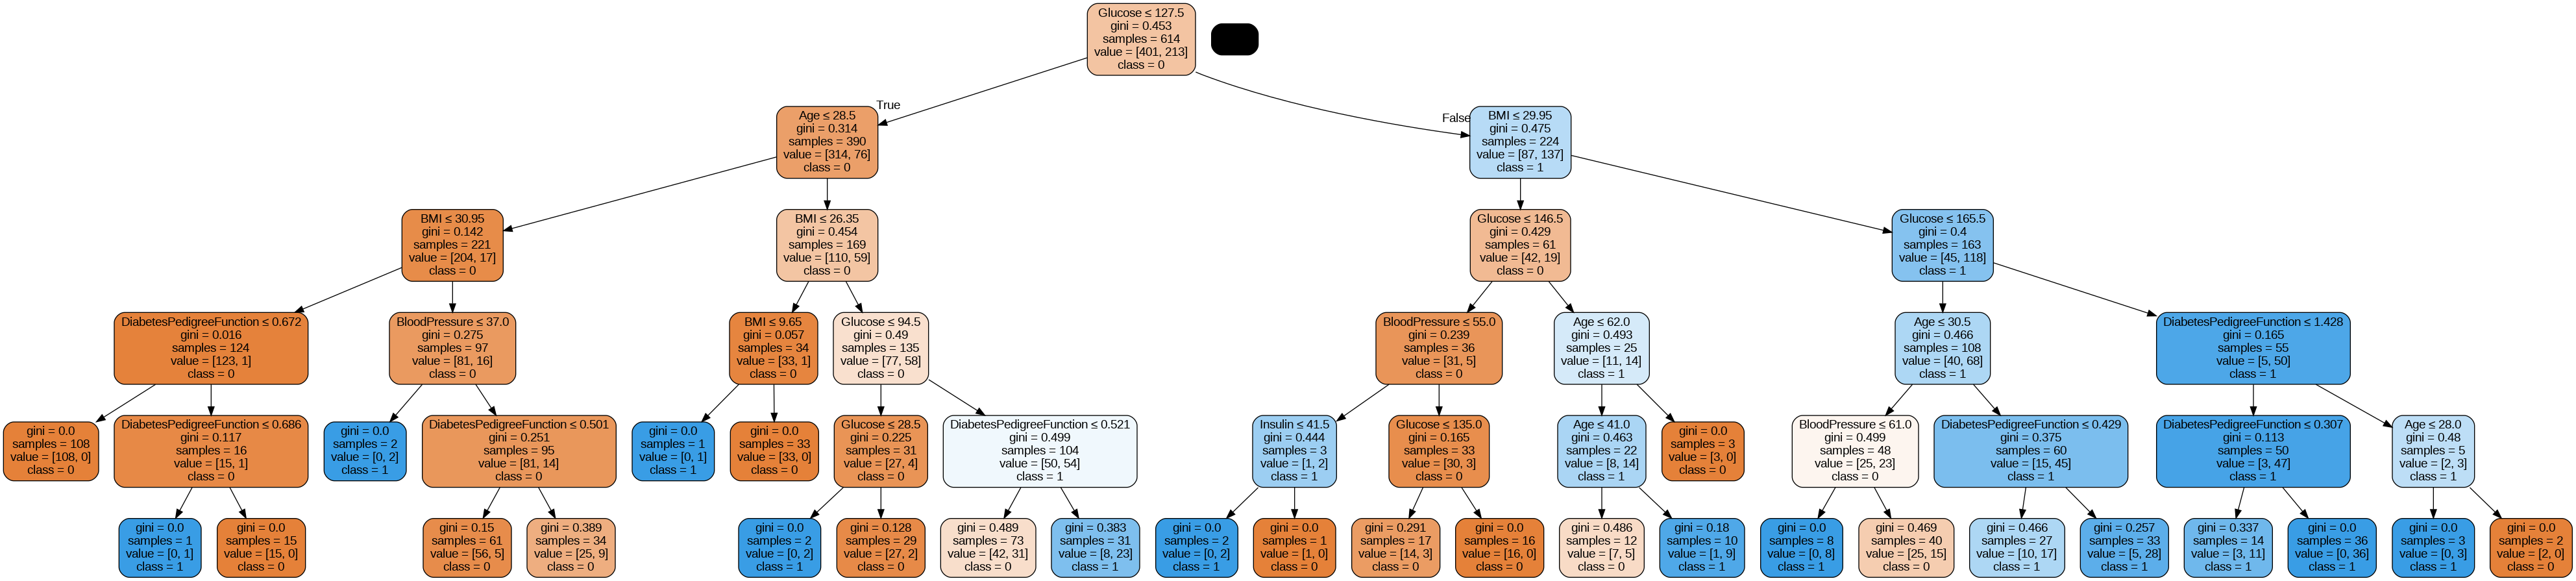

In [32]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()   # use lowercase consistently

export_graphviz(
    dtc, 
    out_file=dot_data,
    filled=True, 
    rounded=True, 
    special_characters=True,
    feature_names=x_train.columns, 
    class_names=['0','1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [5]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Naive Bayes

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zhijinzhai/loandata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loandata


In [33]:
import pandas as pd
import numpy as np
loan_df = pd.read_csv("/kaggle/input/loandata/Loan payments data.csv")

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

df = pd.read_csv("/kaggle/input/loandata/Loan payments data.csv")

df = df.drop(['Loan_ID', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days'], axis=1)

le_status = LabelEncoder()
df['loan_status'] = le_status.fit_transform(df['loan_status'])  # target

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_edu = LabelEncoder()
df['education'] = le_edu.fit_transform(df['education'])

print(df.head())

X = df.drop('loan_status', axis=1)
y = df['loan_status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_train = nb.predict(x_train)
y_pred_test = nb.predict(x_test)

train_acc = metrics.accuracy_score(y_train, y_pred_train) * 100
test_acc = metrics.accuracy_score(y_test, y_pred_test) * 100

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")


   loan_status  Principal  terms  age  education  Gender
0            2       1000     30   45          1       1
1            2       1000     30   50          0       0
2            2       1000     30   33          0       0
3            2       1000     15   27          3       1
4            2       1000     30   28          3       0
Train Accuracy: 61.50%
Test Accuracy: 52.00%


# SVM

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
print(df.info())

X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(x_train, y_train)

y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

train_acc = metrics.accuracy_score(y_train, y_pred_train) * 100
test_acc = metrics.accuracy_score(y_test, y_pred_test) * 100

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# KNN

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())


X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)  # k=5 by default
knn.fit(x_train, y_train)

# Predictions
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# Accuracy
train_acc = metrics.accuracy_score(y_train, y_pred_train) * 100
test_acc = metrics.accuracy_score(y_test, y_pred_test) * 100

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Train Accuracy: 97.50%
Test Accuracy: 93.33%
